In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm 
import numpy as np
import random
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

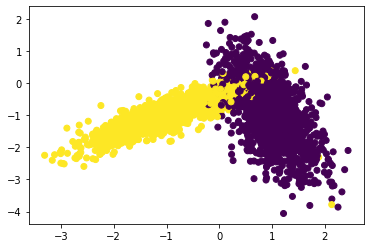

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [ ]:
'''def RandomSearchCV(X_train, y_train, classifier, param_range, folds):
    trainscores = []
    testscores = []
    #generating 10 unique values from param_range
    params = (np.random.uniform(param_range[0], param_range[-1], 10))
    params.sort()
    
    #dividing X_train into 'folds' equal groups
    X_groups = np.split(X_train, folds)
    y_groups = np.split(y_train, folds)
        
    #cross validation
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for i in range(folds):
            X_testcv=[]
            X_traincv=[]
            y_traincv=[]
            y_testcv=[]
            
            X_testcv = X_groups[folds-1-i]
            X_traincv = X_groups[folds-3-i]
            X_traincvv = X_groups[folds-2-i]
            X_traincv = np.vstack((X_traincvv,X_traincv))       
            y_testcv = y_groups[folds-1-i]
            y_traincv = y_groups[folds-3-i]
            y_traincvv = y_groups[folds-2-i]
            y_traincv = np.hstack((y_traincvv,y_traincv))
            
            classifier.n_neighbors = int(k)
            classifier.fit(X_traincv,y_traincv)

            Y_predicted = classifier.predict(X_testcv)
            testscores_folds.append(accuracy_score(y_testcv, Y_predicted))

            Y_predicted = classifier.predict(X_traincv)
            trainscores_folds.append(accuracy_score(y_traincv, Y_predicted))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params'''

In [ ]:
'''from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

folds = 3

parem = (1,100)
trainscores,testscores, params = RandomSearchCV(X_train, y_train, neigh, parem , folds)
 

plt.plot(params, trainscores, label='train cruve')
plt.plot(params, testscores, label='test cruve')
plt.plot(xlabel='param')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()'''

In [25]:
def RandomSearchCV(X_train, y_train, classifier, param_range, folds):
    trainscores = []
    testscores = []
    #generating 10 unique values from param_range
    params = random.sample(range(param_range[0], param_range[-1]), 10)
    #print(params)
    params.sort()
    
    #dividing X_train into 'folds' equal groups
    ii = 0
    jj = int(len(X_train)/folds)
    jj_ = jj
    X_groups = []
    y_groups = []
    for i in range(folds):
        X_groups.append(X_train[ii:jj,:])
        y_groups.append(y_train[ii:jj])
        ii = jj
        jj += jj_
    
    #cross validation
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for i in range(folds):
            X_testcv=[]
            X_traincv=[]
            y_traincv=[]
            y_testcv=[]
            
            X_testcv = X_groups[i]
            #print(X_testcv)
            for iii in range(len(X_groups)):
                if i != iii:
                    X_traincv.extend(X_groups[iii])
            #X_traincv = X_groups[folds-3-i]
            #X_traincvv = X_groups[folds-2-i]
            #X_traincv = np.vstack((X_traincvv,X_traincv))       
            y_testcv = y_groups[i]
            for iii in range(len(y_groups)):
                if i != iii:
                    y_traincv.extend(y_groups[iii])
            
            classifier.n_neighbors = int(k)
            classifier.fit(X_traincv,y_traincv)

            Y_predicted = classifier.predict(X_testcv)
            testscores_folds.append(accuracy_score(y_testcv, Y_predicted))

            Y_predicted = classifier.predict(X_traincv)
            trainscores_folds.append(accuracy_score(y_traincv, Y_predicted))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

# Model

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.57s/it]


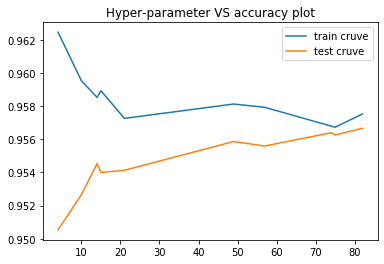

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

folds = 3

parem = (1,100)
trainscores,testscores, params = RandomSearchCV(X_train, y_train, neigh, parem , folds)
 

plt.plot(params, trainscores, label='train cruve')
plt.plot(params, testscores, label='test cruve')
plt.plot(xlabel='param')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [27]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

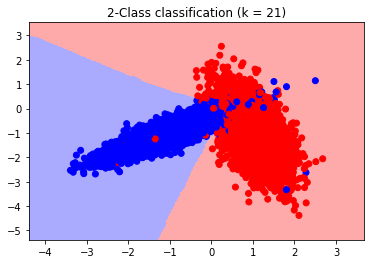

In [28]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)